QUESTION 1 - Logistic Regression: \
MY L1 LOGISTIC REGRESSION MODEL\
Classification accuracy using test dataset: 0.93\
Factors that most positively influence getting a job: [6, 7, 4] 

SKLEARNS L1 LOGISTIC REGRESSION MODEL\
Classification accuracy using test dataset (Sklearn Logistic Regression): 1.0\
Factors that most positively influence getting a job: (Sklearn Logistic Regression) [6 4 7] 

CONCLUSIONS/COMPARISONS
Sklearn's L1 logistic regression model outperforms my model in terms of classification accuracy, but despite the difference in accuracy, 
the identified factors that positively influence getting a job are consistent between the two models, with variations in their order of importance.
We can safely conclude that having a large social network, graduating in good economic condition, and number of internships are the most important
features in getting a job right out of college

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as SklearnLR

X = genfromtxt('job_right_out_of_college_X.csv', delimiter=',')
y = np.reshape(genfromtxt('job_right_out_of_college_y.csv', delimiter='\n'), (-1, 1))

# splitting data into train, validate, and test sets
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# scale between 0 and 1 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


class L1LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=15000, lmbda=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lmbda = lmbda
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # gradient
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + (self.lmbda / num_samples) * np.sign(self.weights)
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.round(y_pred)

log_reg_model_l1 = L1LogisticRegression()
log_reg_model_l1.fit(X_train_scaled, y_train)
predictions_test = log_reg_model_l1.predict(X_test_scaled)


accuracy = np.mean(predictions_test == y_test)
print("Classification accuracy using test dataset:", accuracy)

# my logistic regression model
weights = log_reg_model_l1.weights
sorted_factors = np.argsort(weights, axis=0)[::-1]
print("Factors sorted by importance:")
for idx in sorted_factors:
    print(f"Factor {idx + 1}: Importance = {weights[idx][0]}")
positive_idxs = [idx + 1 for idx, weight in enumerate(weights) if weight > 0]
sorted_positive_idxs = sorted(positive_idxs, key=lambda x: weights[x-1], reverse=True)
print("Factors that most positively influence getting a job:", sorted_positive_idxs[:3])

# sklearns logistic regression model
sklearn_log_reg_model = SklearnLR(penalty='l1', C=1.0, solver='liblinear')
sklearn_log_reg_model.fit(X_train_scaled, y_train.ravel())
sklearn_predictions_test = sklearn_log_reg_model.predict(X_test_scaled)
# calc accuracy
sklearn_accuracy = np.mean(sklearn_predictions_test == y_test.ravel())
print("\nClassification accuracy using test dataset (Sklearn Logistic Regression):", sklearn_accuracy)
sklearn_weights = sklearn_log_reg_model.coef_[0]
sorted_factors_sklearn = np.argsort(sklearn_weights, axis=0)[::-1]
print("Factors sorted by importance (Sklearn Logistic Regression):")
for idx in sorted_factors_sklearn:
    print(f"Factor {idx + 1}: Importance = {sklearn_weights[idx]}")
top_3_positive_indices = np.argsort(-sklearn_weights)[:3] # get the indices of the top 3 positive weights
print("Factors that most positively influence getting a job: (Sklearn Logistic Regression)", top_3_positive_indices+1)


Classification accuracy using test dataset: 0.93
Factors sorted by importance:
Factor [6]: Importance = [4.20828037]
Factor [7]: Importance = [1.73495175]
Factor [4]: Importance = [1.69215687]
Factor [2]: Importance = [0.69831213]
Factor [1]: Importance = [-0.47657057]
Factor [3]: Importance = [-0.82907833]
Factor [5]: Importance = [-1.38155349]
Factors that most positively influence getting a job: [6, 7, 4]

Classification accuracy using test dataset (Sklearn Logistic Regression): 1.0
Factors sorted by importance (Sklearn Logistic Regression):
Factor 6: Importance = 15.27919887321764
Factor 4: Importance = 7.02662021765166
Factor 7: Importance = 6.010302900048695
Factor 2: Importance = 4.878918825384579
Factor 1: Importance = 0.4420740315228692
Factor 3: Importance = -0.11969051333483208
Factor 5: Importance = -2.989979442798547
Factors that most positively influence getting a job: (Sklearn Logistic Regression) [6 4 7]


QUESTION 2 - ENTROPY VIA PYTHON INTEGRATION AND SAMPLING APPROXIMATION \
(integration by python) Entropy for Max: 0.999999999999744 \
(integration by python) Entropy for Ella: 11.918390573078392 \
(integration by python) Entropy for Anushka: 9.425329527341509 

(integration by sampling) Entropy for Max: 0.9959146309179986 \
(integration by sampling) Entropy for Ella: 11.918375573190895 \
(integration by sampling) Entropy for Anushka: 9.152814919548142 

The student suffering from the greatest uncertainty is Ella, as she has the highest entropy.

In [8]:
from scipy.integrate import quad
import math
import numpy as np
def pm(x): # max's probability density function - exponential
    if x >= 40000:
        return np.exp(-(x - 40000))
    else:
        return 0

def pe(x): # ella's probability density function - uniform 
    if (x >= 30000 and x <= 180000) :
         return 1/150000
    else:
        return 0

def pa(x): # anushka's probability density function - gaussian 
    μ = 60000
    σ = 3000
    epsilon = 1e-10
    return (np.exp(-(x-μ)**2/(2*σ**2)))/(np.sqrt(2*np.pi)*σ) + epsilon


def entropy(p, xmin, xmax):
    res, err = quad(lambda x: -p(x) * math.log(p(x)) if p(x) > 0 else 0 , xmin, xmax)
    return res

# entropy for each student
entropy_max = entropy(pm, 40000, 41000)
entropy_ella = entropy(pe, 30000, 180000)
entropy_anushka = entropy(pa, 45000, 75000)


print("(integration by python) Entropy for Max:", entropy_max)
print("(integration by python) Entropy for Ella:", entropy_ella)
print("(integration by python) Entropy for Anushka:", entropy_anushka)



def entropy_sampling(probabilities):
    epsilon = 1e-10  # Small positive value to prevent division by zero
    log_probabilities = np.log(1 / (probabilities + epsilon))
    return np.mean(log_probabilities)

# entropy using numpy automatic integration
def exp_sampling(bound, n):
    u = np.random.uniform(0, 1, n)
	# samples = -np.log(1 - u) / theta
    samples = bound - np.log(1 - u)
    return samples

def gaussian_rejection_sampling(mu, sigma, n):
    samples = []
    while len(samples) < n:
        x = np.random.normal(mu, sigma)
        u = np.random.uniform(0, 1)
        if u < pa(x):
            samples.append(x)
    return np.array(samples)

def pm_probabilities():
    samples = exp_sampling(bound = 40000, n =100000)
    return np.array([pm(val) for val in samples])

def pe_probabilities():
    samples = np.random.uniform(30000, 180000, 100000)
    return np.array([pe(val) for val in samples])

def pa_probabilities():
    mu = 60000
    sigma = 3000
    samples = gaussian_rejection_sampling(mu, sigma, 20)
    return np.array([pa(val) for val in samples])

print("(integration by sampling) Entropy for Max:", entropy_sampling(pm_probabilities()))
print("(integration by sampling) Entropy for Ella:", entropy_sampling(pe_probabilities()))
print("(integration by sampling) Entropy for Anushka:", entropy_sampling(pa_probabilities()))


(integration by python) Entropy for Max: 0.999999999999744
(integration by python) Entropy for Ella: 11.918390573078392
(integration by python) Entropy for Anushka: 9.425329527341509
(integration by sampling) Entropy for Max: 0.9959146309179986
(integration by sampling) Entropy for Ella: 11.918375573190895
(integration by sampling) Entropy for Anushka: 9.152814919548142


QUESTION 3 - KL DIVERGENCE USE CASE \
p(x) and q(x) can be approximated with KDE \
At roughly 10000 samples, the KL Divergence coverges to around 0, meaning we only need roughly 1/10 of the population data to approximate the relationship\
KL Divergence (Scipy Quad Integral) between p(x) and q(x) with 10000 samples: 0.003\
KL Divergence (Integral Approximation) between p(x) and q(x) with 10000 samples: 0.005\
Linear Function/Weights: 1.40148x + 0.53872\
Report the mse = Mean Squared Error on all data: 0.007526117427096816\
In the end what’s nsub? What percentage of the total was needed to perform regression?\
nsub was 10000 samples, meaning we only needed roughly 10% to perform regression.

In [2]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt


X = genfromtxt('hours_slept_X.csv', delimiter=',')
X_t = np.transpose(X)
y = np.reshape(genfromtxt('hours_slept_y.csv', delimiter='\n'), (-1, 1))

mean_X, sd_X = np.mean(X), np.std(X)
x = np.linspace(mean_X - 4 * sd_X, mean_X + 4 * sd_X, 100)

def gaussian(μ, σ, x):
    return (np.exp(-(x-μ)**2/(2*σ**2)))/(np.sqrt(2*np.pi)*σ) + 0.00001

def kl_divergence(p, q, x):
    return np.sum(p(x) * np.log((p(x)) / (q(x))))

def p(x): # p(x) is approximated by KDE
    sigma = 0.05
    n = len(X)
    kde = 0
    for j in range(n):
        kde += gaussian(X[j], sigma, x)
    kde /= n
    kde = np.maximum(kde, 0.00001)
    return kde


def q(x, samples): # q(x) is approximated by KDE
    sigma = 0.05
    n = len(samples)
    kde = 0
    for j in range(n):
        kde += gaussian(samples[j], sigma, x)
    kde /= n
    kde = np.maximum(kde, 0.00001)
    
    return kde

50 1.2784672883070933
100 1.5451503854337374
150 0.6998847974691778
200 0.676840052059627
250 1.1313312376785634
300 0.9253783242762367
350 0.5301662342674058
400 0.6209887516961933
450 0.3650749630241757
500 0.5698253762397715
550 0.6707488877627972
600 0.6280162321974089
650 0.5510898634727825
700 0.271701410491841
750 0.3435290995259004
800 0.4640129105262724
850 0.47681371164851066
900 0.3614131086695137
950 0.1862230779110019
1000 0.43804904861087535
1050 0.5668540011549582
1100 0.4774964841782092
1150 0.5285275613258607
1200 0.38695895545061304
1250 0.23893179151790192
1300 0.14668997715101076
1350 0.4953035522014585
1400 0.2984053282308763
1450 0.5819544417270864
1500 0.2800546580431372
1550 0.17164890113597875
1600 0.30575226798736466
1650 0.4105815686936637
1700 0.36024351850184516
1750 0.25412623995617506
1800 0.41003142449205937
1850 0.44977188090865405
1900 0.4195288900438587
1950 0.20147538039829577
2000 0.4551079322194907
2050 0.30554639054583943
2100 0.3170152839507594
2

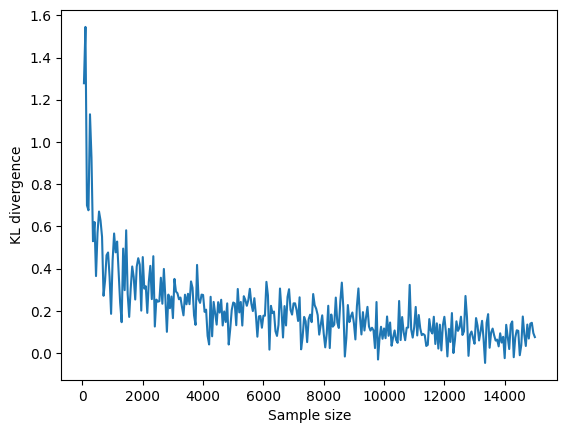

In [3]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt


kldiv = []
i = 50
epsilon = 1e-10  
sample_sizes = []
samples_dict = {} # store the samples for each sample size

while i <= 15000: # at roughly 10000 samples, the KL divergence converges
    samples_kde = np.random.choice(X, size=i, replace=False) # i also want to store the y values for each generated sample
    y_samples_kde = np.array([y[np.where(X == sample)][0] for sample in samples_kde])
    samples_dict[i] = (samples_kde, y_samples_kde)
    kl_approximated = np.mean(np.log((p(x) + epsilon) / (q(x, samples_kde) + epsilon)))
    kldiv.append(kl_approximated)
    print(i, kl_approximated)
    sample_sizes.append(i)
    i += 50

plt.plot(sample_sizes, kldiv)
plt.xlabel('Sample size')
plt.ylabel('KL divergence')
plt.show()

# print (kldiv)

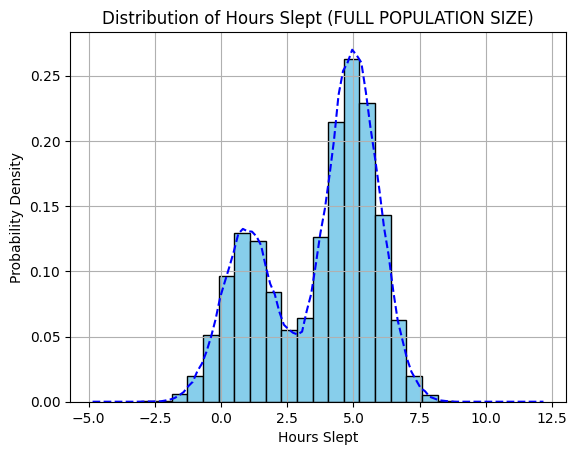

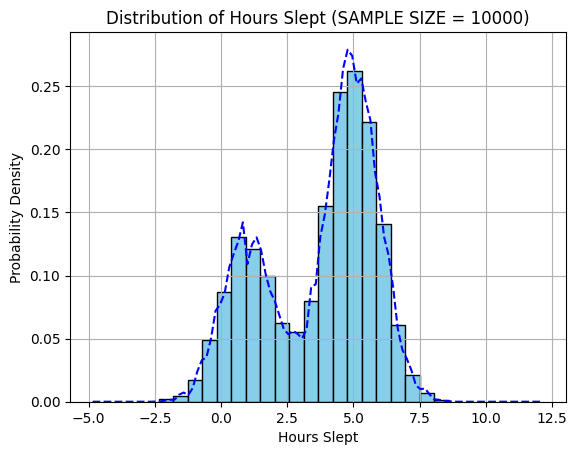

Linear Function/Weights: 1.40148x + 0.53801
[1.40148429 0.53801439]
Mean Squared Error on all the data: 0.00753453880551881
KL Divergence (Integral): 0.0030374898445584345


/var/folders/q9/rltlgwkj7dq7qt_fbzv7sdcw0000gn/T/ipykernel_96528/4041465482.py:70: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  kl_divergence_integral, err = quad(lambda x: kl_divergence(p, q1, x), -5, 12.5)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

plt.hist(X, bins=20, density=True, color='skyblue', edgecolor='black')
plt.plot(x, p(x), 'b--', label='p(x)')
plt.xlabel('Hours Slept')
plt.ylabel('Probability Density')
plt.title('Distribution of Hours Slept (FULL POPULATION SIZE)')
plt.grid(True)
plt.show()

plt.hist(samples_dict[10000][0], bins=20, density=True, color='skyblue', edgecolor='black')
plt.plot(x, q(x, samples_dict[10000][0]), 'b--', label='p(x)')
plt.xlabel('Hours Slept')
plt.ylabel('Probability Density')
plt.title('Distribution of Hours Slept (SAMPLE SIZE = 10000)')
plt.grid(True)
plt.show()

## LINEAR REGRESSION MODEL:
import autograd.numpy as np
from autograd import grad

x_lin = np.reshape(samples_dict[10000][0], (-1, 1)) # hours slept, 10000 samples
y_lin = np.reshape(samples_dict[10000][1], (-1, 1)) # performance score, 10000 samples

def feature_map_linear(x):
    # phi_i = x, 1 -> we have a slope (m) and a constant (b)
    return np.hstack([x, np.ones_like(x)])

def gradient_descent(X, y, learning_rate=0.1, iters=1000): 
    # X is feature map, y is our target labels
    m, n = X.shape
    w = np.zeros(n) # n weights
    for i in range(iters):
        y_pred = X.dot(w)
        gradient = X.T.dot(y_pred - np.squeeze(y)) / m  # find gradient, ensure y has shape (10000,)
        w -= learning_rate * gradient  # update weights
    return w

X_lin = feature_map_linear(x_lin)
w_lin = gradient_descent(X_lin, y_lin, learning_rate=0.1, iters=2000)

print("Linear Function/Weights: {:.5f}x + {:.5f}".format(w_lin[0], w_lin[1]))
print(w_lin)

# use the found weight on all the data points
X_new = feature_map_linear( np.reshape(X, (-1, 1))) 
y_pred_new = X_new.dot(w_lin.reshape(-1,1))
mse = np.mean((y_pred_new - y) ** 2)
print("Mean Squared Error on all the data:", mse)

samples = samples_dict[10000][0]
def q1(x): # q(x) is approximated by KDE
    sigma = 0.05
    n = len(samples)
    kde = 0
    for j in range(n):
        kde += gaussian(samples[j], sigma, x)
    kde /= n
    kde = np.maximum(kde, 0.00001)
    return kde
        
kl_divergence_integral, err = quad(lambda x: kl_divergence(p, q1, x), -5, 12.5)
print("KL Divergence (Integral):", kl_divergence_integral)